This notebook demonstrates the impact of SVD-based model compression of a feed-forward neural network on the MNIST classification task.

In [27]:
from tensorflow import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Data Preprocessing
traingen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        rotation_range=10,  # randomly rotate images 
        zoom_range = 0.1, # randomly zoom images
        width_shift_range=0.1,  # randomly shift images horizontally 
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=False,  # don't flip
        vertical_flip=False)

testgen = ImageDataGenerator(
        rescale=1.0 / 255.0)
        
batch=64

# load and iterate training dataset
train_it = traingen.flow(x_train, y_train, batch_size=batch)
# load and iterate test dataset
test_it = testgen.flow(x_test, y_test, batch_size=batch, shuffle=False)

Build and train the base model

Epoch 1/100
938/938 [==============================] - 17s 17ms/step - loss: 0.6184 - sparse_categorical_accuracy: 0.8123 - val_loss: 0.1862 - val_sparse_categorical_accuracy: 0.9456
Epoch 2/100
938/938 [==============================] - 16s 17ms/step - loss: 0.2621 - sparse_categorical_accuracy: 0.9220 - val_loss: 0.1393 - val_sparse_categorical_accuracy: 0.9558
Epoch 3/100
938/938 [==============================] - 16s 18ms/step - loss: 0.2147 - sparse_categorical_accuracy: 0.9347 - val_loss: 0.1251 - val_sparse_categorical_accuracy: 0.9613
Epoch 4/100
938/938 [==============================] - 18s 19ms/step - loss: 0.1836 - sparse_categorical_accuracy: 0.9446 - val_loss: 0.1079 - val_sparse_categorical_accuracy: 0.9652
Epoch 5/100
938/938 [==============================] - 17s 18ms/step - loss: 0.1720 - sparse_categorical_accuracy: 0.9490 - val_loss: 0.0921 - val_sparse_categorical_accuracy: 0.9698
Epoch 6/100
938/938 [==============================] - 16s 17ms/step - loss: 0.1607 -

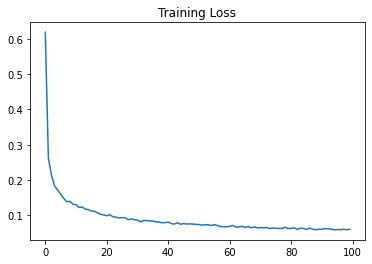

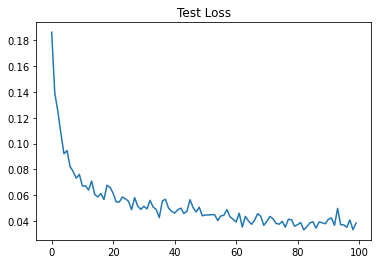

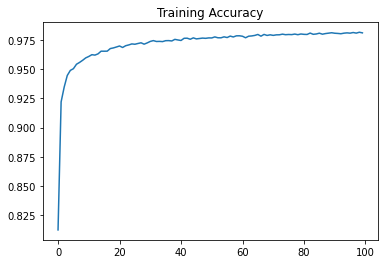

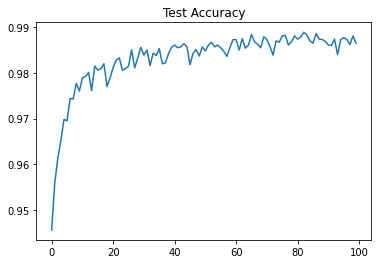

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", 
              metrics="sparse_categorical_accuracy")

history = model.fit(train_it, validation_data=test_it, epochs=100)

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.show()
plt.plot(history.history['val_loss'])
plt.title('Test Loss')
plt.show()
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('Training Accuracy')
plt.show()
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Test Accuracy')
plt.show()

In [29]:
Y_pred = model.predict(test_it)
y_pred = np.argmax(Y_pred,1)
print('Confusion Matrix:')
confm=confusion_matrix(y_test, y_pred)
print(confm)
print('Test Accuracy:')
print(np.trace(confm)/np.sum(confm))

Confusion Matrix:
[[ 973    0    1    0    0    1    2    1    2    0]
 [   0 1130    0    0    0    0    3    2    0    0]
 [   1    1 1019    1    0    0    0    4    5    1]
 [   0    0    2  997    0    7    0    1    1    2]
 [   0    0    1    0  970    0    3    3    0    5]
 [   2    0    0    3    0  884    2    1    0    0]
 [   0    3    0    0    2    3  949    0    0    1]
 [   0    3    6    1    2    0    0 1014    1    1]
 [   4    0    4    6    1    1    1    2  951    4]
 [   0    3    0    4   14    3    0    6    1  978]]
Test Accuracy:
0.9865


In [30]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 100)               78500     
                                                                 
 dense_61 (Dense)            (None, 50)                5050      
                                                                 
 dense_62 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


Build and train the compressed models

Epoch 1/10
938/938 [==============================] - 17s 17ms/step - loss: 0.1563 - sparse_categorical_accuracy: 0.9523 - val_loss: 0.0722 - val_sparse_categorical_accuracy: 0.9764
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1237 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9807
Epoch 3/10
938/938 [==============================] - 17s 18ms/step - loss: 0.1183 - sparse_categorical_accuracy: 0.9643 - val_loss: 0.0649 - val_sparse_categorical_accuracy: 0.9798
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.0691 - val_sparse_categorical_accuracy: 0.9789
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1092 - sparse_categorical_accuracy: 0.9663 - val_loss: 0.0602 - val_sparse_categorical_accuracy: 0.9806
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1029 - spars

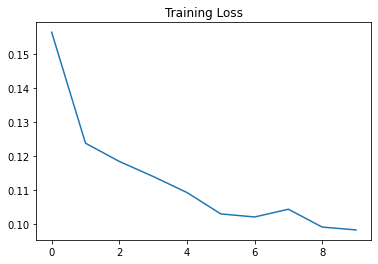

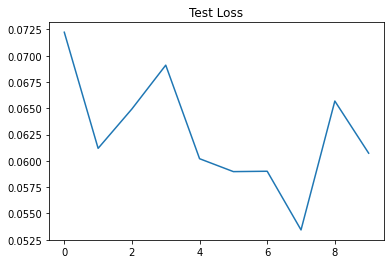

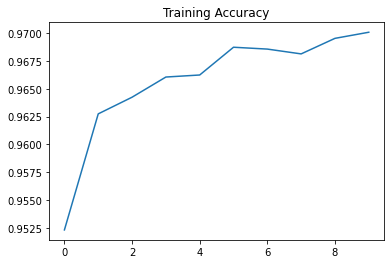

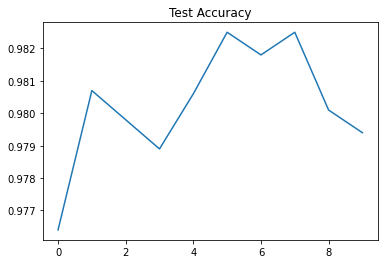

Confusion Matrix:
[[ 972    0    2    0    0    1    3    0    2    0]
 [   0 1124    0    2    0    0    3    0    6    0]
 [   3    5  980   32    1    0    0    5    6    0]
 [   0    0    1  999    0    4    0    2    2    2]
 [   0    0    1    0  968    0    2    2    0    9]
 [   2    0    0   11    0  875    3    0    0    1]
 [   5    1    0    0    4    1  943    0    4    0]
 [   0    2    5    3    1    0    0 1013    0    4]
 [   0    1    1   12    1    7    0    1  948    3]
 [   0    3    0    8   12    5    0    4    5  972]]
Test Accuracy:
0.9794
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_63 (Dense)            (None, 50)                39250     
                                                                 
 dense_64 

In [31]:
from keras import layers
from keras import models

def compress(layer_matrices,ratio,activation='relu'):
    W = layer_matrices[0]
    b = layer_matrices[1]
    U, s, V = np.linalg.svd(W, full_matrices=False) # SVD-based low-rank matrix approximation of the weight matrix

    k = int(W.shape[1] / ratio)
    Uk = U[:,:k]
    sk = s[:k]
    Vk = V[:k,:]

    Uprime = np.dot(Uk, np.diag(sk))
    layer_one = tf.keras.layers.Dense(Uprime.shape[1], input_shape=(Uprime.shape[0],), weights=[Uprime, np.zeros(k)]) #zero bias
    layer_two = tf.keras.layers.Dense(Vk.shape[1], input_shape=(Uprime.shape[0],), weights=[Vk, b],activation=activation) #original bias
    return layer_one, layer_two
    
def buildAndRun(ratio):
    first_layers = compress(model.layers[1].get_weights(),ratio)
    second_layers = compress(model.layers[2].get_weights(),ratio)
    third_layers = compress(model.layers[3].get_weights(),ratio,'softmax')

    compressed = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28,1)),
      first_layers[0], first_layers[1],
      second_layers[0], second_layers[1],
      third_layers[0], third_layers[1],
    ])

    compressed.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy", 
                  metrics="sparse_categorical_accuracy")

    history = compressed.fit(train_it, validation_data=test_it, epochs=10)

    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.show()
    plt.plot(history.history['val_loss'])
    plt.title('Test Loss')
    plt.show()
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.title('Training Accuracy')
    plt.show()
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('Test Accuracy')
    plt.show()

    Y_pred = compressed.predict(test_it)
    y_pred = np.argmax(Y_pred,1)
    print('Confusion Matrix:')
    confm=confusion_matrix(y_test, y_pred)
    print(confm)
    print('Test Accuracy:')
    print(np.trace(confm)/np.sum(confm))

    compressed.summary()

buildAndRun(ratio=2) # 2x compression

Epoch 1/10
938/938 [==============================] - 17s 17ms/step - loss: 0.9452 - sparse_categorical_accuracy: 0.6860 - val_loss: 0.4872 - val_sparse_categorical_accuracy: 0.8835
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 0.5366 - sparse_categorical_accuracy: 0.8698 - val_loss: 0.3679 - val_sparse_categorical_accuracy: 0.9192
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.4412 - sparse_categorical_accuracy: 0.8940 - val_loss: 0.2989 - val_sparse_categorical_accuracy: 0.9341
Epoch 4/10
938/938 [==============================] - 17s 18ms/step - loss: 0.3952 - sparse_categorical_accuracy: 0.9059 - val_loss: 0.2762 - val_sparse_categorical_accuracy: 0.9408
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3750 - sparse_categorical_accuracy: 0.9109 - val_loss: 0.2571 - val_sparse_categorical_accuracy: 0.9435
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3503 - spars

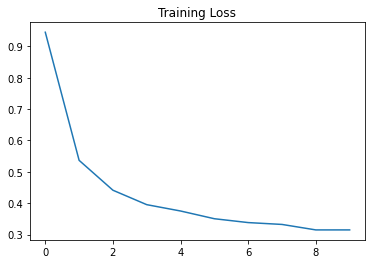

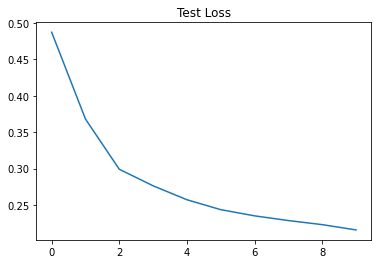

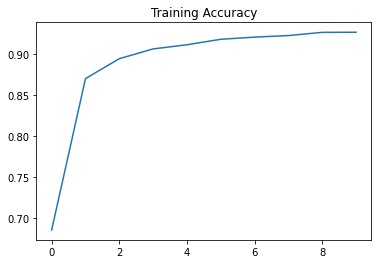

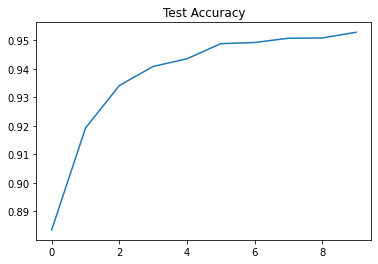

Confusion Matrix:
[[ 952    0    2    1    0   15    2    0    8    0]
 [   0 1105    2    6    1    0    1    2    6   12]
 [   5    0  994   11    0    1    1    0   19    1]
 [   0    0   30  932    0    3    0   15   27    3]
 [   0    2    0    1  939    0    9    0    6   25]
 [   2    1    0    1    0  861    4    1   20    2]
 [   0    1    0    0    4   14  932    0    6    1]
 [   0    6    7   17    1    0    0  981    3   13]
 [   3    0    9    3    0   19    5    2  917   16]
 [   0    2    0    2   38    1    1    7   43  915]]
Test Accuracy:
0.9528
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 25)                19625     
                                                                 
 dense_70 

In [32]:
buildAndRun(ratio=4) # 4x compression

Epoch 1/10
938/938 [==============================] - 17s 17ms/step - loss: 1.8038 - sparse_categorical_accuracy: 0.2748 - val_loss: 1.4652 - val_sparse_categorical_accuracy: 0.3665
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 1.4900 - sparse_categorical_accuracy: 0.3964 - val_loss: 1.3131 - val_sparse_categorical_accuracy: 0.4661
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 1.3737 - sparse_categorical_accuracy: 0.4706 - val_loss: 1.2281 - val_sparse_categorical_accuracy: 0.5140
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 1.2960 - sparse_categorical_accuracy: 0.5114 - val_loss: 1.1740 - val_sparse_categorical_accuracy: 0.5671
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 1.2450 - sparse_categorical_accuracy: 0.5458 - val_loss: 1.1205 - val_sparse_categorical_accuracy: 0.6009
Epoch 6/10
938/938 [==============================] - 17s 18ms/step - loss: 1.2063 - spars

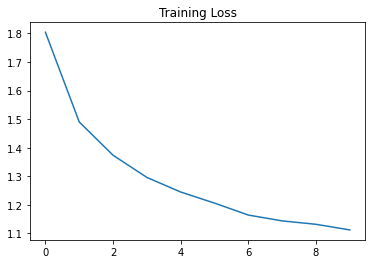

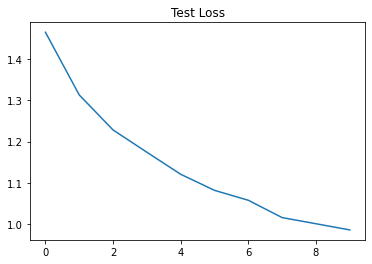

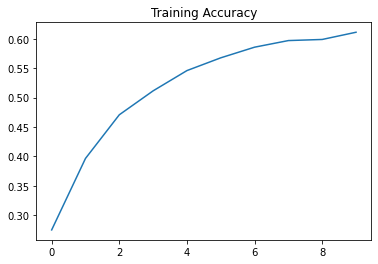

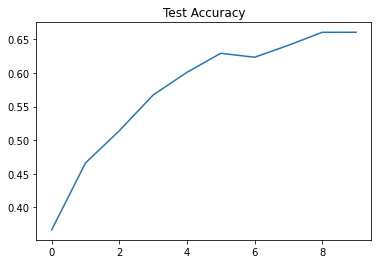

Confusion Matrix:
[[ 890    0   10    4    1    0   73    1    1    0]
 [   0 1086    6    7   11    2    2   19    2    0]
 [   2    0  856   42    4   47   78    1    2    0]
 [   0    0   46  863   12   60    1    2   25    1]
 [   0    0    8   18  894    5    6   20   29    2]
 [   1    0  200  463   10  196   11    1   10    0]
 [  35    0   56    3    0    0  858    4    2    0]
 [   0   22    8    9   93    0    1  883    2   10]
 [   2    0   51  773   21   45    8    2   72    0]
 [   0    3    5   29  916    2    1   34   12    7]]
Test Accuracy:
0.6605
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_75 (Dense)            (None, 12)                9420      
                                                                 
 dense_76 

In [33]:
buildAndRun(ratio=8) # 8x compression